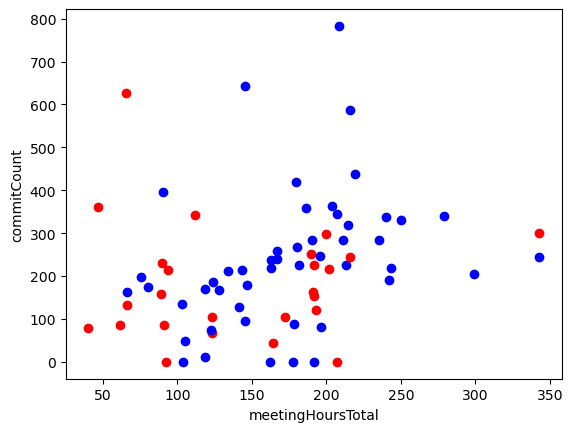

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

projectInterval = pd.read_csv('process_data/setapProcessT9.csv')

# meetingHoursTotal
# commitCount
# helpHoursTotal
# issueCount
# teamMemberResponseCount
# averageCodingDeliverablesHoursTotalByStudent

x = ['meetingHoursTotal']
y = ['commitCount']

cols = [x[0], y[0], 'SE Process grade']

df = pd.DataFrame(projectInterval, columns=cols)

grade_map = { 'A': 'b', 'F': 'r' }

for index, row in df.iterrows():
    grade = row['SE Process grade']
    plt.scatter(row[x], row[y], color=grade_map[grade], marker='o')

plt.xlabel(x[0])
plt.ylabel(y[0])

# Display the plot
plt.show()

In [10]:
# PCA and EDA

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

projectInterval = pd.read_csv('process_data/setapProcessT9.csv')

x = ['teamMemberResponseCount']
y = ['commitCount']

# meetingHours
# helpHoursTotal
# inPersonMeetingHoursTotal
# averageHelpHoursTotalByWeek



# issueCount on time vs late

# teamMemberResponseCount
# averageResponsesByStudent
# averageResponsesByWeek

# averageCodingDeliverablesHoursTotalByStudent
# nonCodingDeliverablesHoursTotal
# codingDeliverablesHoursTotal

# commitCount
# averageCommitCountByWeek
# averageCommitCountByStudent

cols = [x[0], y[0], 'SE Process grade']

df2 = pd.DataFrame(projectInterval, columns=cols)

one_hot_encoded = pd.get_dummies(df2['SE Process grade'])

encoded_data = pd.concat([df2.drop('SE Process grade', axis=1), one_hot_encoded], axis=1)

# print("Encoded DataFrame:")
# print(encoded_data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

pca = PCA(n_components=2)

transformed_data = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Print the transformed data
# print("Transformed data:")
# print(transformed_data)

# Print the explained variance ratio
# print("Explained variance ratio:")
# print(explained_variance_ratio)

grade_map = { 'A': 'b', 'F': 'r' }

for index, row in enumerate(transformed_data):
    grade = df2['SE Process grade'][index]
#     plt.scatter(row[0], row[1], color=grade_map[grade], marker='o')

# plt.xlabel(x[0])
# plt.ylabel(y[0])

# Display the plot
# plt.show()

In [3]:
# Select K Best

from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

projectInterval3 = pd.read_csv('process_data/setapProcessT9.csv')

cols3 = [
    'meetingHoursTotal',
    'helpHoursTotal',
    'averageHelpHoursTotalByWeek',
    'averageResponsesByWeek',
    'averageResponsesByStudent',
    'inPersonMeetingHoursTotal',
    'averageCommitCountByWeek',
    'commitCount',
    'averageCodingDeliverablesHoursTotalByStudent',
    'lateIssueCount',
    'issueCount',
    'SE Process grade',
    'codingDeliverablesHoursTotal',
    'nonCodingDeliverablesHoursTotal',
    'averageCommitCountByStudent',
    'responsesPerHelpHour'
]

df3 = pd.DataFrame(projectInterval3, columns=cols3)
# df3 = df3.drop([72, 73])
# df3['lateIssueRatio'] = df3['lateIssueCount'] / df3['issueCount']

# df3['commitsPerHelpHour'] = df3['commitCount'] / df3['helpHoursTotal']
df3['responsesPerHelpHour'] = df3['averageResponsesByStudent'] / df3['helpHoursTotal']

# print(df3['lateIssueRatio'])

df3_no_target = df3.drop('SE Process grade', axis=1)
target_variable = df3['SE Process grade']

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(df3_no_target, target_variable)

# Get the k values for each feature
feature_names = df3_no_target.columns
k_values = selector.scores_

# Create a DataFrame to store the k values for each feature and target variable combination
results_df = pd.DataFrame(columns=['Feature', 'Target Variable', 'k Value'])

# Iterate over each feature and target variable
for feature in feature_names:
    for target in target_variable.unique():
        mask = target_variable == target
        k_value = k_values[feature_names == feature][0]
        results_df = pd.concat([results_df, pd.DataFrame({'Feature': feature, 'Target Variable': target, 'k Value': k_value}, index=[0])], ignore_index=True)

print(results_df)


                                         Feature Target Variable     k Value
0                              meetingHoursTotal               F  111.875446
1                              meetingHoursTotal               A  111.875446
2                                 helpHoursTotal               F  104.143441
3                                 helpHoursTotal               A  104.143441
4                    averageHelpHoursTotalByWeek               F    4.637331
5                    averageHelpHoursTotalByWeek               A    4.637331
6                         averageResponsesByWeek               F    0.605009
7                         averageResponsesByWeek               A    0.605009
8                      averageResponsesByStudent               F    1.061712
9                      averageResponsesByStudent               A    1.061712
10                     inPersonMeetingHoursTotal               F  105.153876
11                     inPersonMeetingHoursTotal               A  105.153876

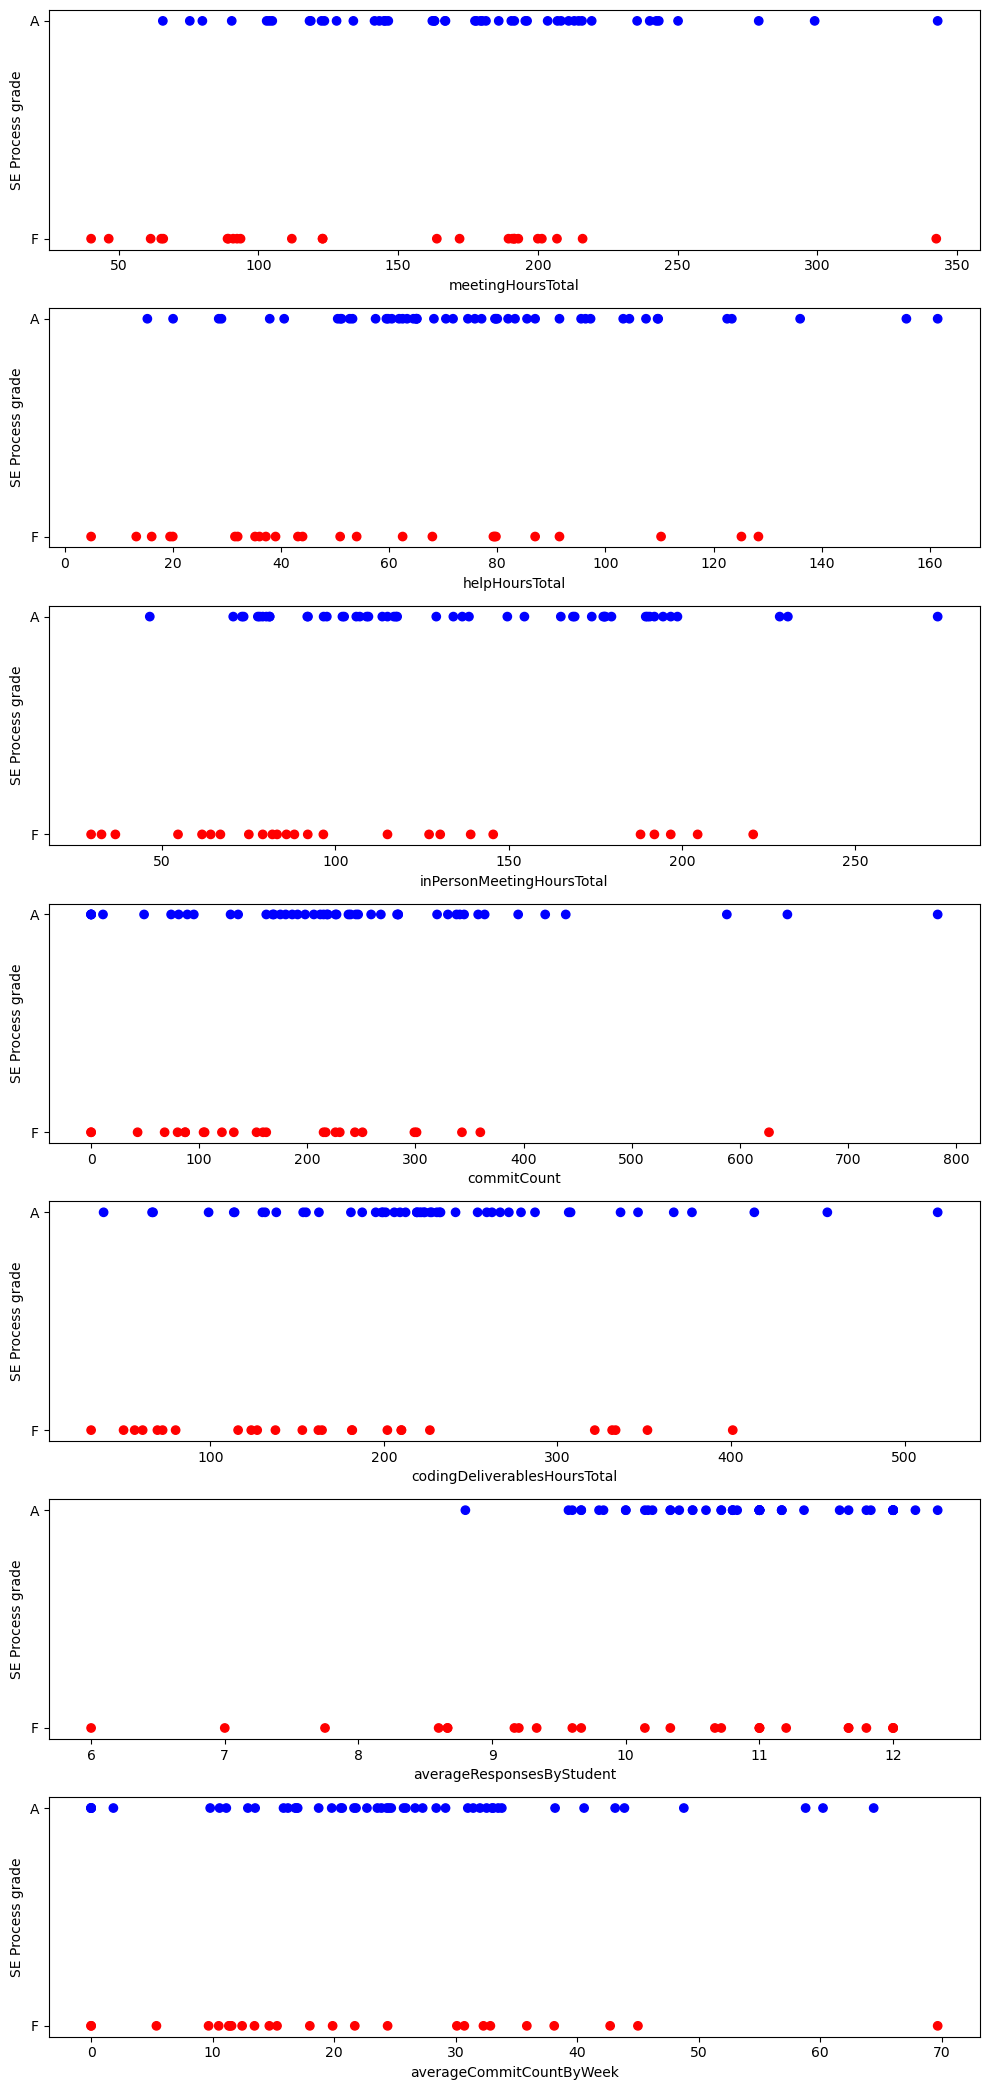

In [10]:
# Visualize selected K bests

cols = [
    'meetingHoursTotal',
    'helpHoursTotal',
    'inPersonMeetingHoursTotal',
    'commitCount',
    'codingDeliverablesHoursTotal',
    'averageResponsesByStudent',
    'averageCommitCountByWeek',
#     'lateIssueCount',
#     'issueCount',
#     'lateIssueRatio',
    'commitsPerHelpHour',
    'responsesPerHelpHour',
    'SE Process grade'
]

df = pd.DataFrame(projectInterval, columns=cols)

# df = df.drop([72, 73])
# df['lateIssueRatio'] = df['lateIssueCount'] / df['issueCount']

df['responsesPerHelpHour'] = df['averageResponsesByStudent'] / df['helpHoursTotal']

df['commitsPerHelpHour'] = df['commitCount'] / df['helpHoursTotal']

grade_map = { 'A': 'b', 'F': 'r' }

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(10, 21))

# meetingHoursTotal
ax1.scatter(df['meetingHoursTotal'], df['SE Process grade'], c=df['SE Process grade'].map(grade_map))
ax1.set_xlabel('meetingHoursTotal')
ax1.set_ylabel('SE Process grade')

# helpHoursTotal
ax2.scatter(df['helpHoursTotal'], df['SE Process grade'], c=df['SE Process grade'].map(grade_map))
ax2.set_xlabel('helpHoursTotal')
ax2.set_ylabel('SE Process grade')

# inPersonMeetingHoursTotal
ax3.scatter(df['inPersonMeetingHoursTotal'], df['SE Process grade'], c=df['SE Process grade'].map(grade_map))
ax3.set_xlabel('inPersonMeetingHoursTotal')
ax3.set_ylabel('SE Process grade')

# commitCount
ax4.scatter(df['commitCount'], df['SE Process grade'], c=df['SE Process grade'].map(grade_map))
ax4.set_xlabel('commitCount')
ax4.set_ylabel('SE Process grade')

# codingDeliverablesHoursTotal
ax5.scatter(df['codingDeliverablesHoursTotal'], df['SE Process grade'], c=df['SE Process grade'].map(grade_map))
ax5.set_xlabel('codingDeliverablesHoursTotal')
ax5.set_ylabel('SE Process grade')

# averageResponsesByStudent
ax6.scatter(df['averageResponsesByStudent'], df['SE Process grade'], c=df['SE Process grade'].map(grade_map))
ax6.set_xlabel('averageResponsesByStudent')
ax6.set_ylabel('SE Process grade')

# averageCommitCountByWeek
ax7.scatter(df['averageCommitCountByWeek'], df['SE Process grade'], c=df['SE Process grade'].map(grade_map))
ax7.set_xlabel('averageCommitCountByWeek')
ax7.set_ylabel('SE Process grade')

# commitsPerHelpHours
# ax8.scatter(df['responsesPerHelpHour'], df['SE Process grade'], c=df['SE Process grade'].map(grade_map))
# ax8.set_xlabel('responsesPerHelpHour')
# ax8.set_ylabel('SE Process grade')

plt.tight_layout()  # Adjust spacing between subplots

plt.show()

# action item
# create new feature with this
# other graphs